In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
x_test

array([[    30,  17000],
       [    57, 122000],
       [    29,  80000],
       [    35,  75000],
       [    37,  78000],
       [    52,  38000],
       [    38,  80000],
       [    32,  18000],
       [    56, 104000],
       [    29,  75000],
       [    24,  84000],
       [    49,  39000],
       [    48,  30000],
       [    19,  25000],
       [    26,  52000],
       [    35,  38000],
       [    36,  60000],
       [    47,  30000],
       [    35,  50000],
       [    25,  33000],
       [    42,  70000],
       [    27,  88000],
       [    60, 102000],
       [    59, 130000],
       [    37, 146000],
       [    30, 107000],
       [    29,  43000],
       [    35,  73000],
       [    34,  43000],
       [    22,  81000],
       [    35,  58000],
       [    37,  80000],
       [    49,  36000],
       [    47,  20000],
       [    42,  73000],
       [    24,  27000],
       [    30,  87000],
       [    41,  72000],
       [    60,  42000],
       [    50,  20000]],

In [4]:
x_train

array([[    48,  90000],
       [    36,  54000],
       [    25,  90000],
       [    29,  83000],
       [    58,  47000],
       [    48, 119000],
       [    39, 134000],
       [    37,  77000],
       [    37,  53000],
       [    32,  18000],
       [    55, 125000],
       [    40,  57000],
       [    41,  59000],
       [    30,  80000],
       [    46,  79000],
       [    45,  26000],
       [    33,  43000],
       [    46,  96000],
       [    35,  20000],
       [    26,  84000],
       [    29,  83000],
       [    46,  88000],
       [    38,  50000],
       [    42,  65000],
       [    40, 142000],
       [    51,  23000],
       [    22,  63000],
       [    20,  23000],
       [    48,  35000],
       [    45,  45000],
       [    28,  59000],
       [    34,  72000],
       [    41,  52000],
       [    52, 150000],
       [    49, 141000],
       [    38,  55000],
       [    47, 113000],
       [    33,  31000],
       [    27,  57000],
       [    52,  21000],


In [5]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [6]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

[[24  0]
 [ 3 13]]


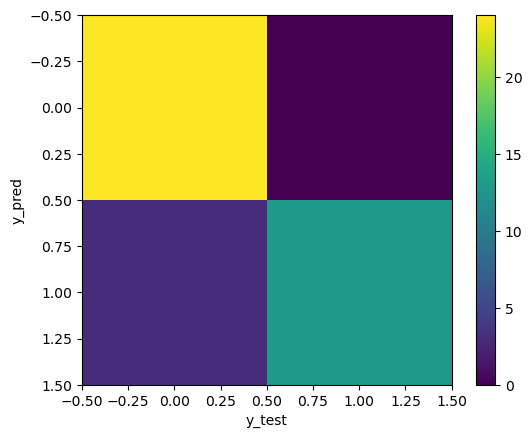

In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.imshow(cm)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.colorbar()
plt.show()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.81      0.90        16

    accuracy                           0.93        40
   macro avg       0.94      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40



In [9]:
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test,y_pred))

0.925


In [ ]:
from matplotlib.colors import ListedColormap

X1,X2=np.meshgrid(np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01),
                 np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01))

Z=classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
Z=Z.reshape(X1.shape)

cmap=ListedColormap(('red','green'))

plt.figure(figsize=(8,6))
plt.contourf(X1,X2,Z,alpha=0.5,cmap=cmap)
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='red',label='0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='green',label='1')
plt.title('NaiveBayes-Training set')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

